In [53]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from lxml import objectify
import pandas as pd
import sklearn
%matplotlib inline

def plot(data, start, end, title = ''):
    plt.title(title)
    for i in range(num_of_weeks):
        plt.plot(data[24*(i)*7+start:end], label='week %d' % (i))
    plt.legend()
    plt.show()

def plot_d(data_pd, tsne_proj, number_of_clusters):
    data = data_pd.values
    time = data_pd.index
    kmeans = KMeans(n_clusters=number_of_clusters)
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    palette = np.array(sns.color_palette("hls", 10))
    plt.scatter(data[:, 2], data[:,0], c=palette[y_kmeans.astype(np.int)], s=10, cmap='viridis')
    centers = kmeans.cluster_centers_
    print(data_pd.columns)
    plt.scatter(centers[:, 2], centers[:, 0], c='black', s=200, alpha=0.5);

    sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
    rc={"lines.linewidth": 2.5})
    scatter(tsne_proj, y_kmeans)
    plt.show()

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,1], x[:,0], lw=0, s=10,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

In [4]:
# Load the dataset
building_num = 1
path=r'building%d_data.csv' % building_num
energy_csv=pd.read_csv(path, index_col=0, parse_dates=[0])

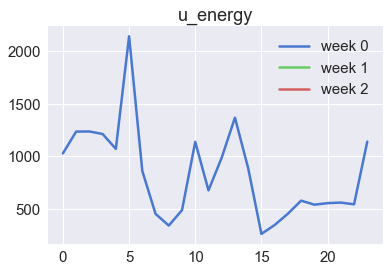

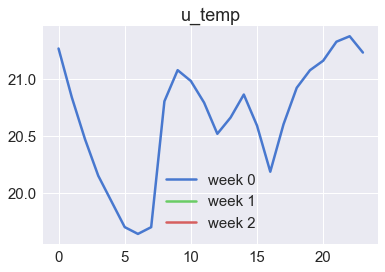

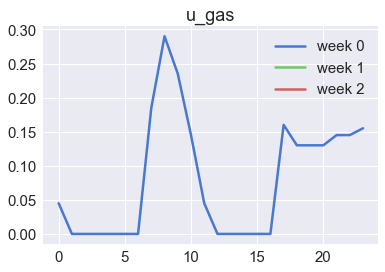

In [48]:
# modify and plot data

# columns = ['u_energy','u_temp','env_temp']
columns = ['u_energy','u_temp','u_gas']
# columns = ['env_temp','u_temp','u_energy','u_gas']

columns_2 = ['u_energy','env_temp','u_temp','u_gas']
week_day = 1
num_of_weeks = 3


energy_data_pd = energy_csv.loc[energy_csv.index,columns]
energy_data_pd = pd.DataFrame(energy_data_pd)
energy_data_pd = energy_data_pd.drop(energy_data_pd.index[:15+24*6])

energy_data_pd_2 = energy_csv.loc[energy_csv.index,columns_2]
energy_data_pd_2 = pd.DataFrame(energy_data_pd_2)
energy_data_pd_2 = energy_data_pd_2.drop(energy_data_pd.index[:15+24*6])

energy_data = energy_data_pd.values
    

start = 24*(week_day-1)
end = 24+24*(week_day-1)


for column in columns:
    data = energy_data_pd.loc[energy_data_pd.index,[column]].values
    plot(data, start, end, column)


In [20]:
# path=r'test_data.csv'
# path=r'test_data_2.csv'
path=r'office_test.csv'

csv=read_csv(path, index_col='Date/Time', parse_dates=True).sort_index()

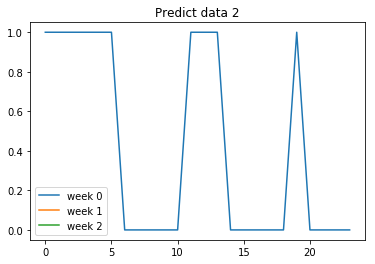

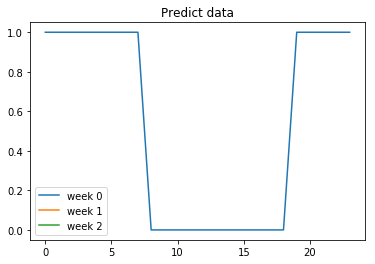

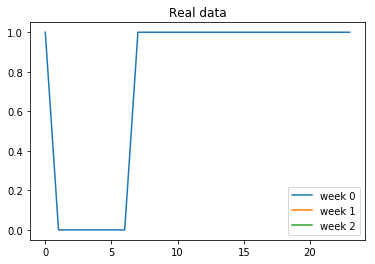

In [25]:
week_day = 2
num_of_weeks = 3
columns = ['env_temp','u_temp','u_energy']
# columns = ['u_energy']

start = 24*(week_day-1)
end = 24+24*(week_day-1)

test_data = csv.loc[csv.index,columns]
test_data_pd = pd.DataFrame(test_data)
test_data_pd = test_data_pd.drop(test_data_pd.index[:23])

real_data = csv.loc[csv.index,['u_occup']]
real_data_pd = pd.DataFrame(real_data)
real_data_pd = real_data_pd.drop(real_data_pd.index[:23])


real_data_pd[real_data_pd.u_occup>0.75] = 1
# real_data_pd[real_data_pd.u_occup>1] = 1
# real_data_pd[real_data_pd.u_occup>=1.5] = 2


test_data = test_data_pd.values
test_k_means = cluster.KMeans(n_clusters=2)
test_k_means.fit(test_data)

plot(test_k_means.labels_, start, end, 'Predict data')

plot(real_data_pd.values, start, end, 'Real data')


In [55]:
digits_proj_7 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 300).fit_transform(energy_data_pd.values)
digits_proj_8 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 300).fit_transform(energy_data_pd_2.values)

Index(['u_energy', 'u_temp', 'u_gas'], dtype='object')


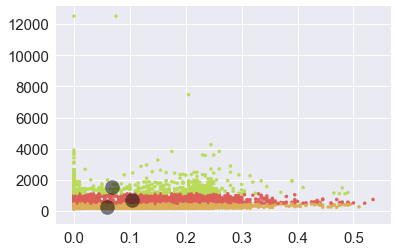

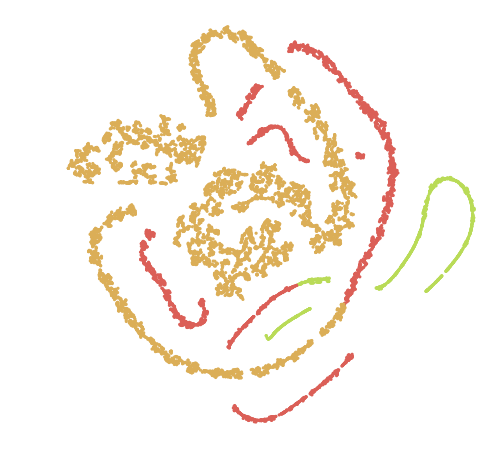

Index(['u_energy', 'env_temp', 'u_temp', 'u_gas'], dtype='object')


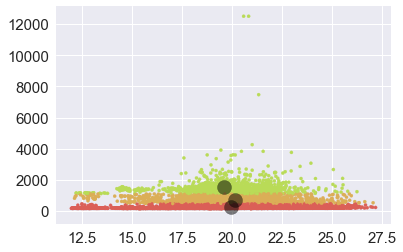

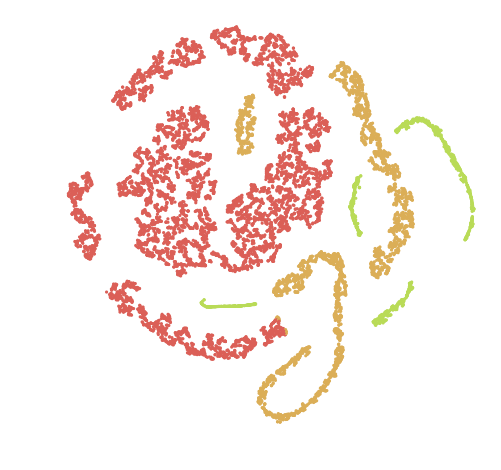

In [57]:
num_of_clusters = 3

plot_d(energy_data_pd, digits_proj_7, num_of_clusters)

plot_d(energy_data_pd_2, digits_proj_8, num_of_clusters)

In [100]:
# digits_proj_5 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 700, perplexity = 10).fit_transform(energy_data_pd_2.values)
digits_proj_6 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 750, perplexity = 55, early_exaggeration = 5).fit_transform(energy_data_pd_2.values)
digits_proj_5 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 750, perplexity = 55).fit_transform(energy_data_pd_2.values)

Index(['u_energy', 'env_temp', 'u_temp', 'u_gas'], dtype='object')


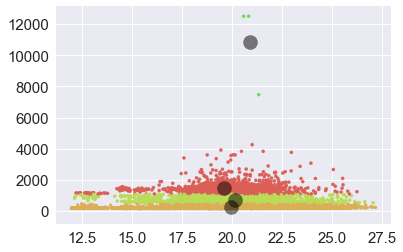

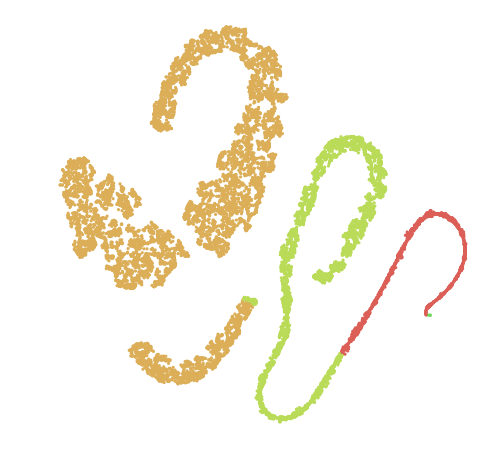

Index(['u_energy', 'env_temp', 'u_temp', 'u_gas'], dtype='object')


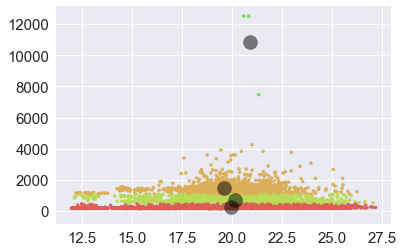

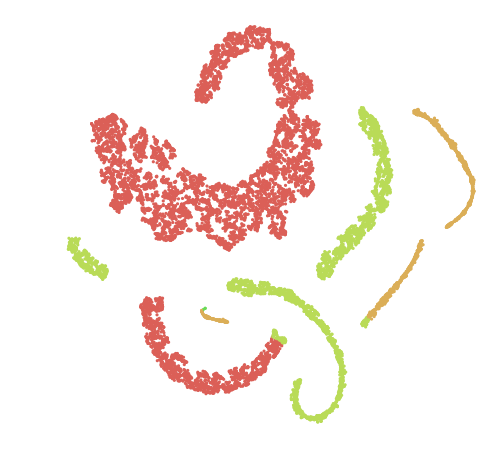

In [102]:
num_of_clusters = 4

plot_d(energy_data_pd_2, digits_proj_5, num_of_clusters)

plot_d(energy_data_pd_2, digits_proj_6, num_of_clusters)

In [39]:
digits_proj_3 = TSNE(random_state = 20150101, n_components = 2).fit_transform(energy_data_pd.values)
digits_proj_4 = TSNE(random_state = 20150101, n_components = 2).fit_transform(energy_data_pd_2.values)

['u_energy', 'u_temp', 'u_gas']


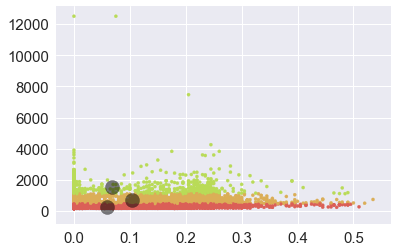

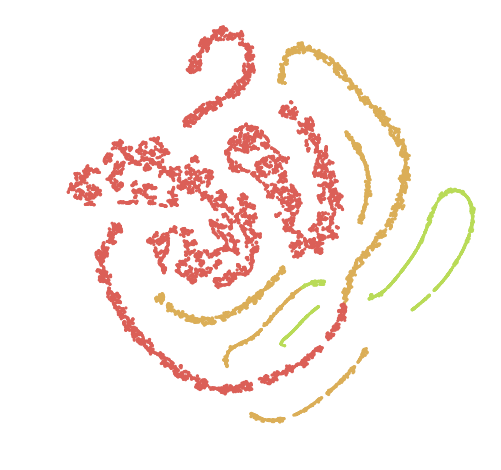

['u_energy', 'u_temp', 'u_gas']


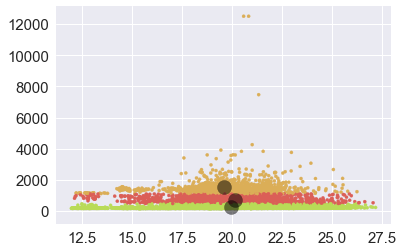

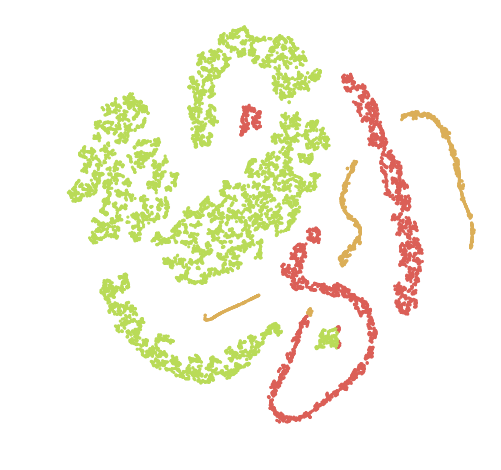

In [49]:
num_of_clusters = 3

plot_d(energy_data_pd, digits_proj_3, num_of_clusters)

plot_d(energy_data_pd_2, digits_proj_4, num_of_clusters)

In [80]:
digits_proj = TSNE(random_state = 20150101, n_components = 2, learning_rate = 10, perplexity = 30).fit_transform(energy_data_pd.values)
digits_proj_2 = TSNE(random_state = 20150101, n_components = 2, learning_rate = 10, perplexity = 30).fit_transform(energy_data_pd_2.values)

['u_energy', 'u_temp', 'u_gas']


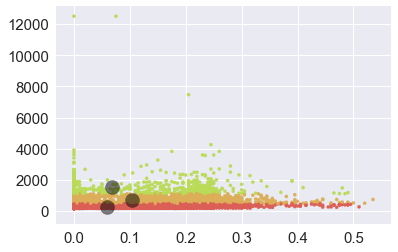

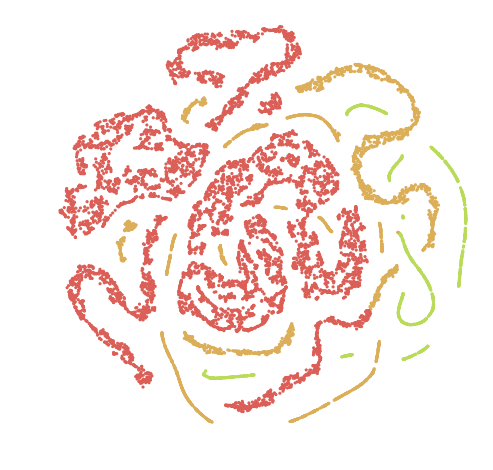

['u_energy', 'u_temp', 'u_gas']


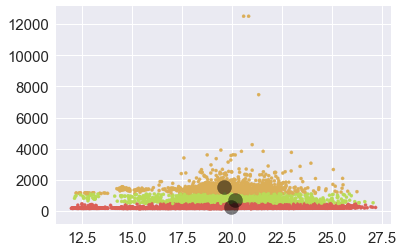

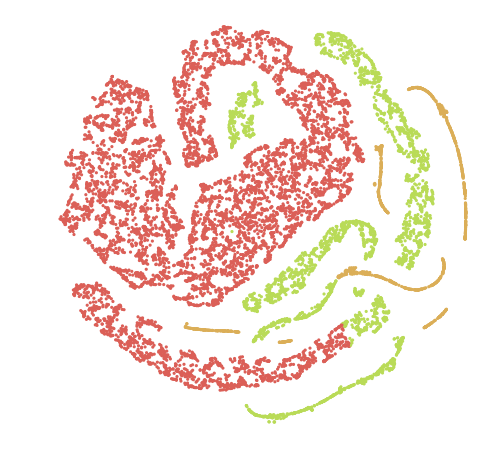

In [51]:
num_of_clusters = 3


plot_d(energy_data_pd, digits_proj, num_of_clusters)

plot_d(energy_data_pd_2, digits_proj_2, num_of_clusters)

In [79]:
columns = ['env_temp','u_temp','u_energy','u_gas']

data = energy_csv.loc[energy_csv.index,columns]

print(data)

pca = sklearn.decomposition.PCA()

pca.fit(data)

pca_data = pca.transform(data)

print(pca_data)

                      env_temp    u_temp     u_energy  u_gas
dateTime                                                    
2013-11-04 09:00:00   5.777333  19.68600   859.707904  0.270
2013-11-04 10:00:00   7.186000  19.15100  1337.131092  0.020
2013-11-04 11:00:00   8.450000  19.16300  1626.900192  0.000
2013-11-04 12:00:00   9.522500  19.40100  1594.797127  0.000
2013-11-04 13:00:00   9.852500  19.55550  1421.016423  0.000
2013-11-04 14:00:00   9.642500  19.65100   699.805792  0.000
2013-11-04 15:00:00   9.150000  19.11550   627.222621  0.000
2013-11-04 16:00:00   8.064750  18.83000   383.864818  0.000
2013-11-04 17:00:00   6.935500  18.77100   469.500849  0.105
2013-11-04 18:00:00   6.223500  18.73500  1118.643581  0.000
2013-11-04 19:00:00   6.005500  18.92500   574.369384  0.000
2013-11-04 20:00:00   6.044750  18.69950   543.933898  0.000
2013-11-04 21:00:00   5.818750  18.50900   567.621622  0.000
2013-11-04 22:00:00   5.204000  18.60400   648.107325  0.000
2013-11-04 23:00:00   4.